## Python scripts to handle interfacial shear simulation results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('classic')
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


/Users/dixu/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Global Constants
AREA = (20.5-0.5)*(20.341234-0.288675)

In [3]:
#readin histogram data
#assume only 1 dump 
def histo(file):
    f = open(file)
    heading=None
    x,y=[],[]
    for line in f:
        if line.startswith("#"):
            continue
        wd=line.split()
        if not heading: #heading not defined
            heading=wd
        else:
            x.append(wd[1])
            y.append(wd[2])
    f.close()
    x = map(float,x)
    y = map(float,y)
    f.close()
    return x,y,heading[2]

In [4]:
#file path setting
folder="/Users/dixu/Desktop/Interfacial_Slip/TOP_BOTTOM/SimulationDesign1/Diblock/12/e05/"

In [5]:
histoA=folder+"polyA.histo"
histoB=folder+"polyB.histo"
histoF=folder+"filler.histo"
Ax,Ay,Acount=histo(histoA)
Bx,By,Bcount=histo(histoB)
Fx,Fy,Fcount=histo(histoF)

In [6]:
all(Ax==Bx) and all(Bx==Fx) #x check
hist=pd.DataFrame(np.array([Ay,By,Fy]).transpose(),index=np.array(Ax),columns=["PolyA","PolyB","Filler"])
hist=hist[hist.any(axis=1)>0]
hist=hist.assign(A= hist.PolyA/(hist.PolyA+hist.PolyB+hist.Filler))
hist=hist.assign(B= hist.PolyB/(hist.PolyA+hist.PolyB+hist.Filler))
hist=hist.assign(F= hist.Filler/(hist.PolyA+hist.PolyB+hist.Filler))
binsize=Ax[1]-Ax[0]
hist=hist.assign(Width = 4*hist.A*(1-hist.A)*binsize)
sum(hist.Width)

5.040568683936591

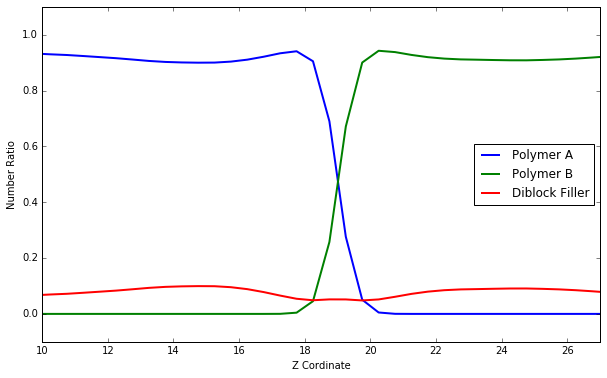

In [7]:
line1=plt.plot(hist.index,hist.A,label="Polymer A")
line2=plt.plot(hist.index,hist.B,label="Polymer B")
line3=plt.plot(hist.index,hist.F,label="Diblock Filler")
plt.xlabel("Z Cordinate")
plt.ylabel("Number Ratio")
plt.ylim(-0.1,1.1)
plt.xlim(10,27)
plt.setp([line1,line2,line3],linewidth=2.0)
plt.legend(loc="best")
plt.savefig("Histogram.png",dpi=300)
plt.show()